# 5 - Complex Network

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./data/train.csv')
np.random.shuffle(train_df.values)

print(train_df.head())

          x         y  color
0 -0.390152  1.716475    1.0
1 -0.773958  1.379063    1.0
2 -0.896935 -4.283031    0.0
3 -4.156475 -3.883824    1.0
4  2.987119 -0.405358    0.0


# Plotting Data

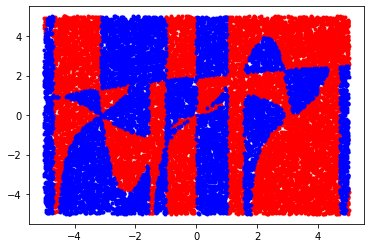

In [3]:
df0 = train_df[train_df.color==0]
df1 = train_df[train_df.color==1]

plt.scatter(df0.x, df0.y, marker = '.', color='red')
plt.scatter(df1.x, df1.y, marker = '.', color='blue')

plt.show()

# Sequencial API

In [4]:
# model = keras.Sequential([
# 	keras.layers.Dense(256, input_shape=(2,), activation='relu'),
# 	keras.layers.Dropout(0.4),
# 	keras.layers.Dense(256, activation='relu'),
# 	keras.layers.Dropout(0.4),
# 	keras.layers.Dense(256, activation='relu'),
# 	keras.layers.Dense(2, activation='sigmoid')])

# Functional API

In [5]:
# Functional API (Func: It is more flexible as it can handle multiple input and multiple output - More Flexible)
inputs = keras.Input(shape=(2,))
x = keras.layers.Dense(256, activation='relu', name='First_layer')(inputs)
#x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(256, activation='relu', name='Second_layer')(x)
#x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(256, activation='relu', name='Third_layer')(x)
outputs = keras.layers.Dense(2, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())   # Network information -> Layers -> Nodes -> Parameters

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
First_layer (Dense)          (None, 256)               768       
_________________________________________________________________
Second_layer (Dense)         (None, 256)               65792     
_________________________________________________________________
Third_layer (Dense)          (None, 256)               65792     
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 132,866
Trainable params: 132,866
Non-trainable params: 0
_________________________________________________________________
None


# Modal Training

In [6]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

x = np.column_stack((train_df.x.values, train_df.y.values))
y = train_df.color.values

In [7]:
model = model.fit(x, y, batch_size=32, epochs=20)

Epoch 1/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5926 - accuracy: 0.6845
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5359 - accuracy: 0.7550
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5277 - accuracy: 0.7611
Epoch 4/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5192 - accuracy: 0.7720
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5079 - accuracy: 0.7842
Epoch 6/20
625/625 [==============================] - 1s 2ms/step - loss: 0.5010 - accuracy: 0.7894
Epoch 7/20
625/625 [==============================] - 1s 2ms/step - loss: 0.4968 - accuracy: 0.7958
Epoch 8/20
625/625 [==============================] - 1s 2ms/step - loss: 0.4886 - accuracy: 0.8061
Epoch 9/20
625/625 [==============================] - 1s 2ms/step - loss: 0.4825 - accuracy: 0.8116
Epoch 10/20
625/625 [==============================] - 1s 2ms/step - loss: 0.4786 - accuracy: 0.8167

# Test Data Evaluation

In [8]:
test_df = pd.read_csv('./data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))
test_y = test_df.color.values
print("EVALUATION")
model.evaluate(test_x, test_y)

EVALUATION
157/157 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8642


[0.4299773871898651, 0.8641999959945679]

# Plotting Test Data

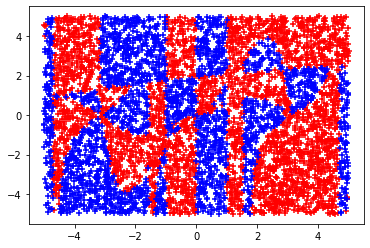

In [9]:
df0 = test_df[test_df.color==0]
df1 = test_df[test_df.color==1]

plt.scatter(df0.x, df0.y, marker = '+', color='red')
plt.scatter(df1.x, df1.y, marker = '+', color='blue')

plt.show()